In [59]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

**Load and Preprocessing**

In [62]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50 #trial and error
CHANNELS = 3

In [64]:
#function call from the TensorFlow Keras library
#used to create a `tf.data.Dataset` from image files in a directory
#you provide the directory path containing the image files, and it automatically labels the images based on subdirectory names
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [66]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [68]:
# every element in the dataset is a batch of about 32 images
for image_batch, label_batch in dataset.take(2):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0]
(32, 256, 256, 3)
[1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 2 1 2 1 0 1 0 0 0 0]


32 image in one batch , each 256x256x3

In [71]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0]) #tensor


tf.Tensor(
[[[172. 171. 177.]
  [143. 142. 148.]
  [175. 174. 180.]
  ...
  [183. 182. 190.]
  [185. 184. 192.]
  [187. 186. 194.]]

 [[144. 143. 149.]
  [139. 138. 144.]
  [165. 164. 170.]
  ...
  [183. 182. 190.]
  [184. 183. 191.]
  [186. 185. 193.]]

 [[187. 186. 192.]
  [179. 178. 184.]
  [184. 183. 189.]
  ...
  [184. 183. 191.]
  [184. 183. 191.]
  [184. 183. 191.]]

 ...

 [[135. 132. 143.]
  [137. 134. 145.]
  [161. 158. 169.]
  ...
  [172. 170. 184.]
  [170. 168. 182.]
  [170. 168. 182.]]

 [[157. 154. 165.]
  [155. 152. 163.]
  [167. 164. 175.]
  ...
  [168. 166. 179.]
  [167. 165. 178.]
  [167. 165. 178.]]

 [[151. 148. 159.]
  [133. 130. 141.]
  [124. 121. 132.]
  ...
  [173. 171. 184.]
  [173. 171. 184.]
  [174. 172. 185.]]], shape=(256, 256, 3), dtype=float32)


In [73]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy()) #convert to numpy 

[[[121. 119. 132.]
  [132. 130. 143.]
  [101.  99. 112.]
  ...
  [161. 163. 176.]
  [162. 164. 177.]
  [163. 165. 178.]]

 [[116. 114. 127.]
  [131. 129. 142.]
  [130. 128. 141.]
  ...
  [161. 163. 176.]
  [165. 167. 180.]
  [167. 169. 182.]]

 [[121. 119. 132.]
  [118. 116. 129.]
  [134. 132. 145.]
  ...
  [156. 158. 171.]
  [161. 163. 176.]
  [164. 166. 179.]]

 ...

 [[139. 137. 150.]
  [163. 161. 174.]
  [170. 168. 181.]
  ...
  [189. 191. 203.]
  [189. 191. 203.]
  [189. 191. 203.]]

 [[134. 132. 145.]
  [163. 161. 174.]
  [151. 149. 162.]
  ...
  [189. 191. 203.]
  [187. 189. 201.]
  [184. 186. 198.]]

 [[142. 140. 153.]
  [165. 163. 176.]
  [162. 160. 173.]
  ...
  [193. 195. 207.]
  [189. 191. 203.]
  [185. 187. 199.]]]


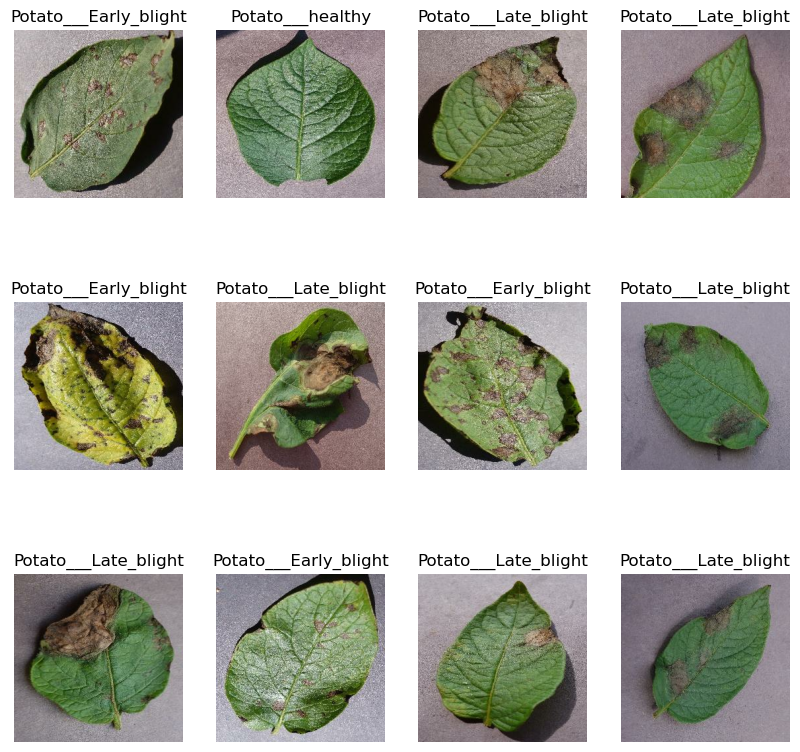

In [75]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [77]:
len(dataset)

68

In [79]:
train_size = 0.8 * len(dataset)
train_size

54.400000000000006

In [81]:
train_ds = dataset.take(54)
len(train_ds)

54

In [83]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [85]:
val_size = 0.1
val_size*len(dataset)

6.800000000000001

In [87]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [89]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [91]:
def get_dataset_partition_tf(ds, train_split = 0.8,val_split = 0.1,test_split=0.1, shuffle = True, shuffle_size = 10000):

    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
        
    train_size= int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    
    return train_ds, val_ds, test_ds
    

In [93]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [95]:
len(train_ds)

54

In [97]:
len(test_ds)

8

In [99]:
len(val_ds)

6

**Caching and Prefetching**

In [102]:
#Purpose: The shuffle() function randomizes the order of the data within the dataset. 
#The argument 10000 specifies the size of the buffer from which the data will be randomly sampled.

In [104]:
#caching and prefetching
#The tf.data.Dataset.cache transformation can cache a dataset, either in memory or on local storage. 
#This will save some operations (like file opening and data reading) from being executed during each epoch. The next epochs will reuse the data cached by the cache transformation.

#Prefetch overlaps the preprocessing and model execution of a training step. While the model is executing training steps, 
#the input pipeline is reading the data for step s+1. Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data.

train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE) #automatically determine the optimal number of batches to prefetch based on available system resources.
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)


**Preprocessing(Resize+Rescaling) and Data Augmentation**

In [107]:
#resize and rescale
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)   
])


In [109]:
#Data augmentation layer, random flip and rotation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

**CNN Model**

In [112]:
#Covolutional and pooling layers, and at the end dense layer
#Model
#preprocessing layers: resize and rescale then data augmentation
#convolution layer--> arguments: no. of filters , size of kernel, activation layer, input shape
#Pooling--> max pooling, avg. pooling: preserve features and reduce image size(computationaly efficient)

#You can stack multiple conv and pooling layers(trial and error)
n_classes = 3
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    #layer 1 , conv+pooling
    layers.Conv2D(32, (3,3) ,activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
     #layer 2 , conv+pooling
    layers.Conv2D(64, kernel_size = (3,3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),
    #layer 3 , conv+pooling    
    layers.Conv2D(64, kernel_size = (3,3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),
     #layer 4 , conv+pooling
    layers.Conv2D(64, kernel_size = (3,3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),
    #layer 5 , conv+pooling
    layers.Conv2D(64, kernel_size = (3,3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),
     #layer 6 , conv+pooling
    layers.Conv2D(64, kernel_size = (3,3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    #Dense layer then output layer
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=input_shape)


In [114]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [116]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [118]:
history = model.fit(
          train_ds,
          epochs = EPOCHS,
          batch_size = BATCH_SIZE,
          verbose = 1,
          validation_data = val_ds, 
         )

Epoch 1/50


54/54 [==============================] - 37s 583ms/step - loss: 0.9092 - accuracy: 0.4907 - val_loss: 0.8768 - val_accuracy: 0.6354
Epoch 2/50
54/54 [==============================] - 29s 542ms/step - loss: 0.6682 - accuracy: 0.7164 - val_loss: 0.5010 - val_accuracy: 0.7604
Epoch 3/50
54/54 [==============================] - 27s 498ms/step - loss: 0.4062 - accuracy: 0.8223 - val_loss: 0.3430 - val_accuracy: 0.8802
Epoch 4/50
54/54 [==============================] - 26s 485ms/step - loss: 0.3169 - accuracy: 0.8715 - val_loss: 0.2988 - val_accuracy: 0.8750
Epoch 5/50
54/54 [==============================] - 27s 491ms/step - loss: 0.2644 - accuracy: 0.8906 - val_loss: 0.2627 - val_accuracy: 0.9167
Epoch 6/50
54/54 [==============================] - 26s 488ms/step - loss: 0.2924 - accuracy: 0.8796 - val_loss: 0.2960 - val_accuracy: 0.8802
Epoch 7/50
54/54 [==============================] - 25s 466ms/step - loss: 0.2245 - accuracy: 0.9126 - val_loss: 0.3443 - val_accuracy: 0.86

**Displaying and plotting History**

In [120]:
#history params
#plot training , validation accuracy vs epochs
#plot training and validation losses vs epochs
history

In [122]:
history.params 

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [124]:
history.history

{'loss': [0.9091747403144836,
  0.6681596040725708,
  0.406203031539917,
  0.3168661296367645,
  0.2644447386264801,
  0.292397141456604,
  0.22454331815242767,
  0.18866384029388428,
  0.1484195590019226,
  0.1487075537443161,
  0.14752964675426483,
  0.12627623975276947,
  0.11484173685312271,
  0.18715150654315948,
  0.17117536067962646,
  0.16636916995048523,
  0.09849154204130173,
  0.1140262633562088,
  0.07830464094877243,
  0.08347133547067642,
  0.06865078210830688,
  0.08112508058547974,
  0.05563357472419739,
  0.07436667382717133,
  0.05827290937304497,
  0.04889529198408127,
  0.03889109566807747,
  0.044240642338991165,
  0.04498818516731262,
  0.046485528349876404,
  0.034575894474983215,
  0.03765537217259407,
  0.0333525687456131,
  0.05434673652052879,
  0.04430517181754112,
  0.025669215247035027,
  0.05052764713764191,
  0.0647168830037117,
  0.04735061153769493,
  0.04133109748363495,
  0.0198204442858696,
  0.03172077238559723,
  0.04449167475104332,
  0.033613029

In [134]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [140]:
acc= history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss =  history.history['val_loss']

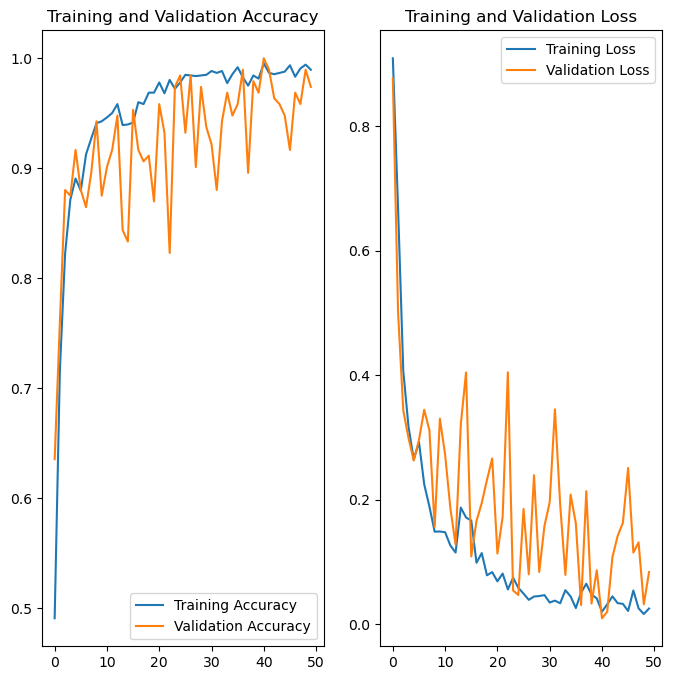

In [146]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss') 
plt.show()

first image to predict
actual_label: Potato___Early_blight
1/1 [==============================] - 0s 147ms/step
[1.000000e+00 7.989403e-10 9.694758e-27]
predicted_label: Potato___Early_blight


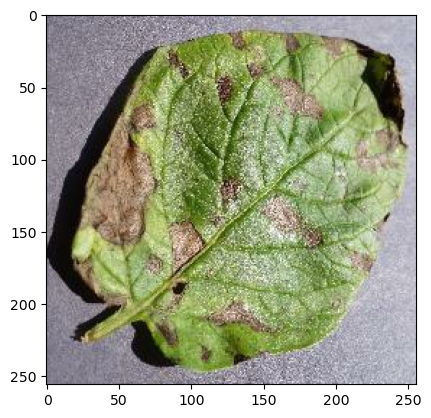

In [177]:
for image_batch, label_batch in test_ds.take(1):
    first_image = (image_batch[0].numpy().astype('uint8'))
    first_actual_label = class_names[label_batch[0].numpy()]
    print("first image to predict")
    plt.imshow(first_image)
    print("actual_label:",first_actual_label)
    batch_prediction = model.predict(image_batch)
    print(batch_prediction[0])
    print("predicted_label:",class_names[np.argmax(batch_prediction[0])])

In [231]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img) 
    img_array = tf.expand_dims(img_array, 0 ) #You can add an outer batch axis by passing axis=0:
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence    

1/1 [==============================] - 0s 19ms/step


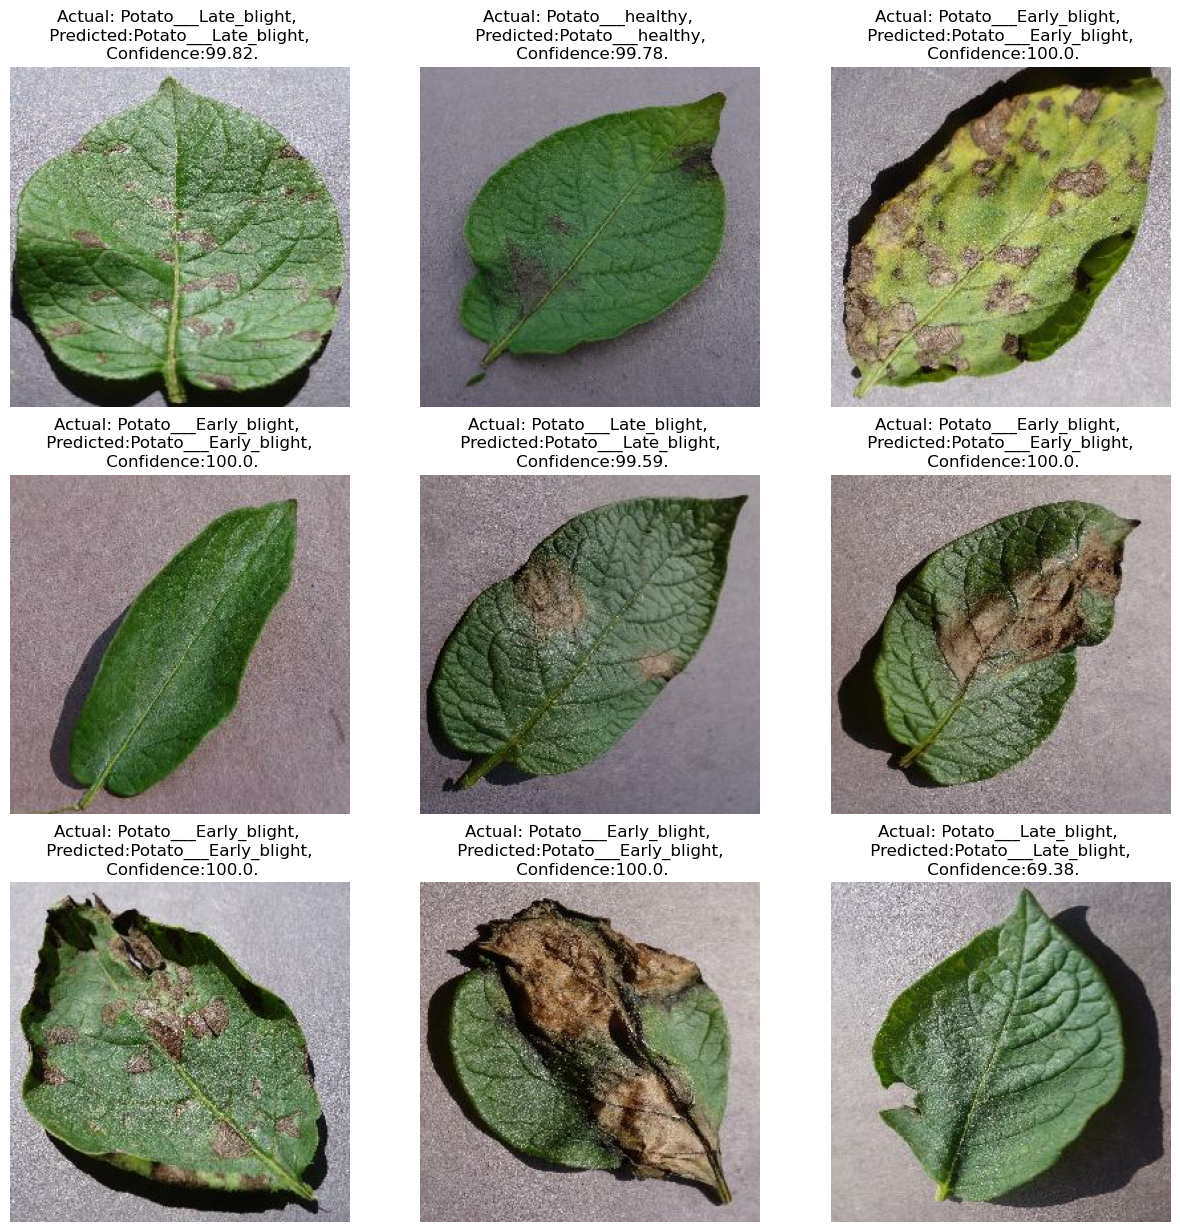

In [233]:
plt.figure(figsize=(15,15))
for images, label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8")) 
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[label[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted:{predicted_class}, \n Confidence:{confidence}.")
        plt.axis("off")        

In [235]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [237]:
#Auto increment model version
import os
model_version = max([int(i) for i in os.listdir("../models")])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
